In [77]:
import pandas as pd
import numpy as np
import nltk

In [78]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin-1')

In [79]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [80]:
df.shape

(5572, 5)

In [81]:
df = df[["v1","v2"]]

In [82]:
df.rename(columns={"v1":"target", "v2":"text"}, inplace=True)

In [83]:
df["target"] = df["target"].map({"ham":0, "spam":1})

In [84]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [85]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [86]:
df.duplicated().sum()

403

In [87]:
df.drop_duplicates(inplace=True, keep="first")

In [88]:
df.shape

(5169, 2)

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

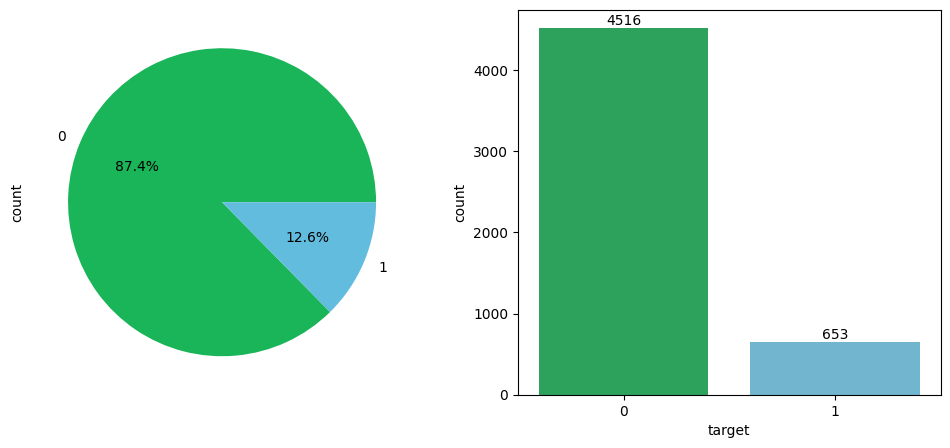

In [90]:
figure, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

custom_colors = ["#19b558", "#62bcde"]
df["target"].value_counts().plot(kind="pie", autopct="%.1f%%", colors = custom_colors, ax=ax1)
fig = sns.countplot(x=df["target"], palette=custom_colors, ax=ax2)
for bar in fig.containers:
    fig.bar_label(bar)

plt.show()

In [91]:
df["num_characters"] = df["text"].apply(len)

In [92]:
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [93]:
df["num_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [94]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [95]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [96]:
df[df["target"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [97]:
df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


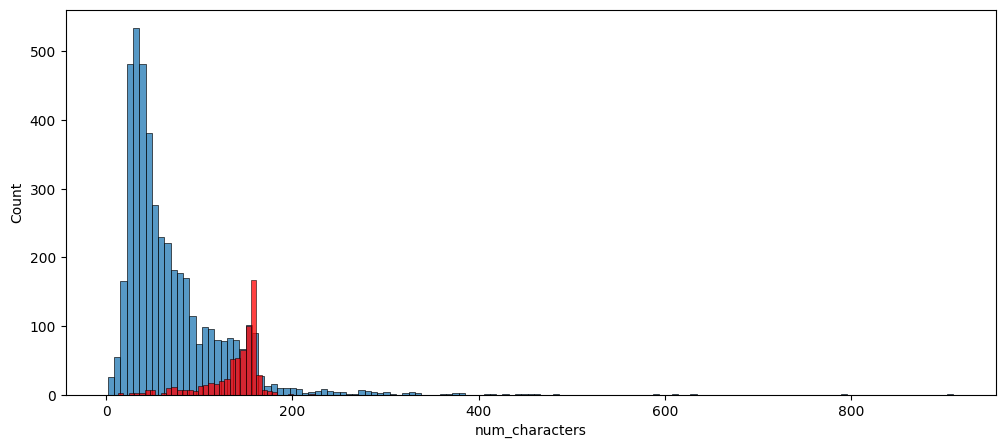

In [98]:
plt.figure(figsize=(12,5))
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"], color="red")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


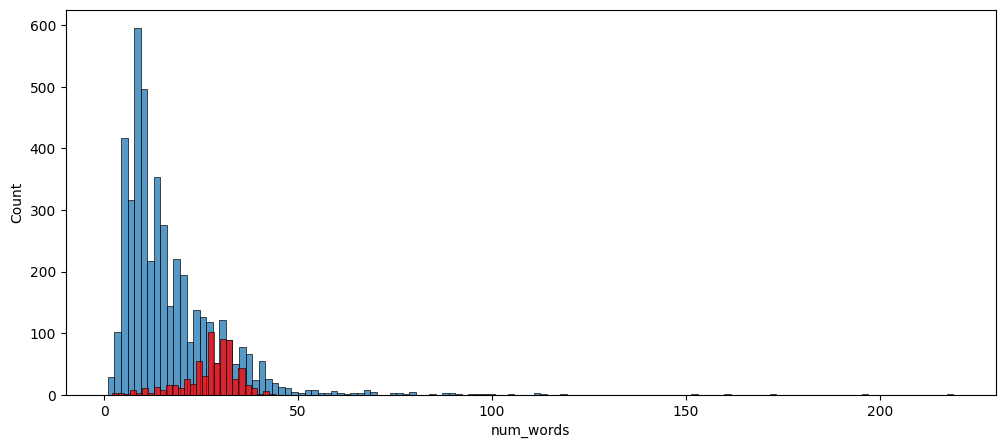

In [99]:
plt.figure(figsize=(12,5))
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"], color="red")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


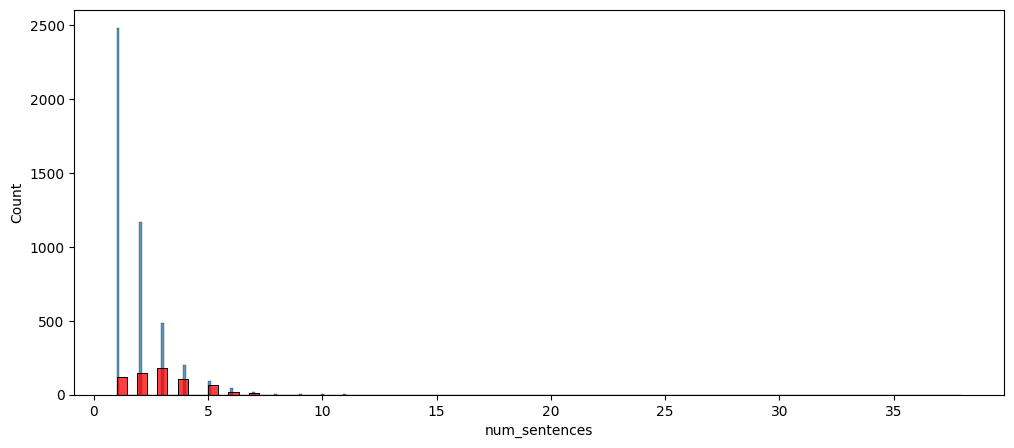

In [100]:
plt.figure(figsize=(12,5))
sns.histplot(df[df["target"]==0]["num_sentences"])
sns.histplot(df[df["target"]==1]["num_sentences"], color="red")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

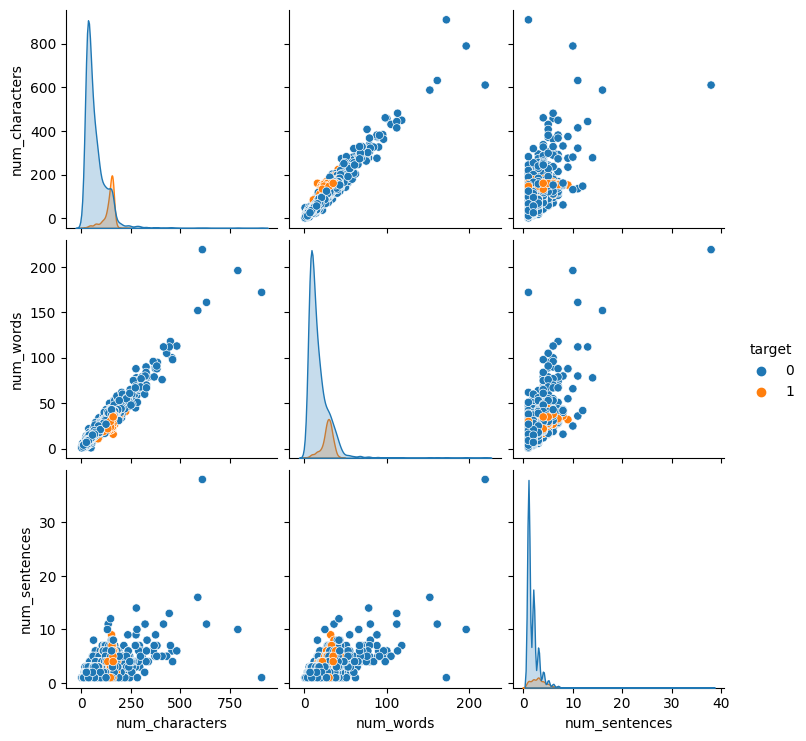

In [101]:
sns.pairplot(df, hue="target")

<Axes: >

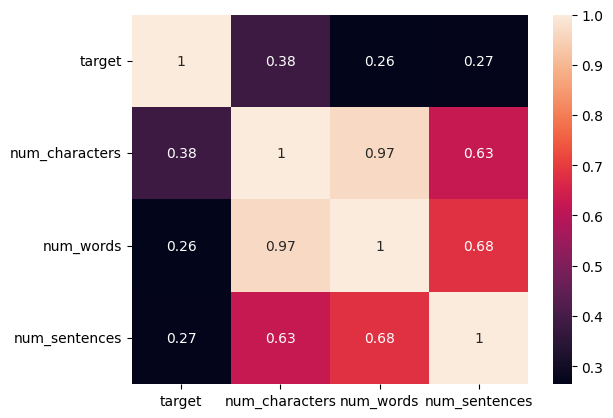

In [102]:
sns.heatmap(df.select_dtypes(["int"]).corr(), annot=True)

In [103]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [104]:
def transform_text(text):
    # 01: transforming text into lower case
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    # 02: getting alphnumeric content from text
    y = []
    for word in text:
        if word.isalnum():
            y.append(word)
    
    # 03: removing stop words and punction marks from text
    text = y[:]
    y.clear()
    for word in text:
        if word not in stopwords.words("english") and word not in string.punctuation:
            y.append(word)
            
    # 04: apply stemming 
    text = y[:]
    y.clear()
    for word in text:
        y.append(PorterStemmer().stem(word))
    
    return " ".join(y)

In [105]:
transform_text("ALi is goods goods how where boy's# ;$# ... >>(a)// !")

'ali good good boy'

In [106]:
df["transformed_text"] = df["text"].apply(transform_text)

In [107]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [108]:
from wordcloud import WordCloud

wc = WordCloud(width=600, height=500, min_font_size=12, background_color="white")

In [109]:
ham_wc = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

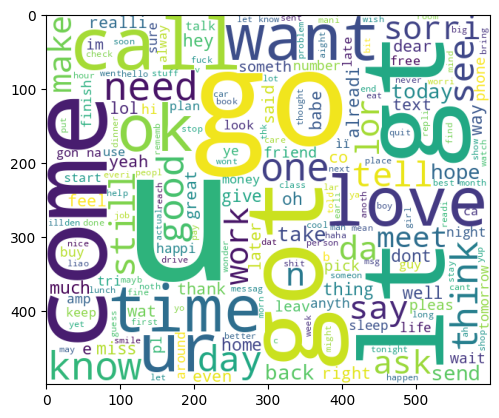

In [110]:
plt.imshow(ham_wc)

In [111]:
spam_wc = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

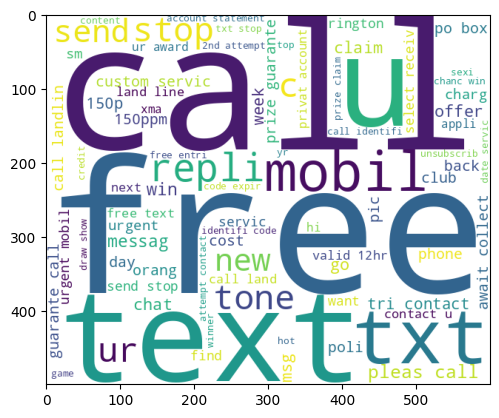

In [112]:
plt.imshow(spam_wc)

In [113]:
from collections import Counter

In [114]:
def top_words(target):
    words = []
    for msg in df[df["target"] == target]["transformed_text"].tolist():
        for word in msg.split():
            words.append(word)
            
    sns.barplot(x=pd.DataFrame(Counter(words).most_common(30))[0], y=pd.DataFrame(Counter(words).most_common(30))[1])
    plt.xticks(rotation="vertical")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()

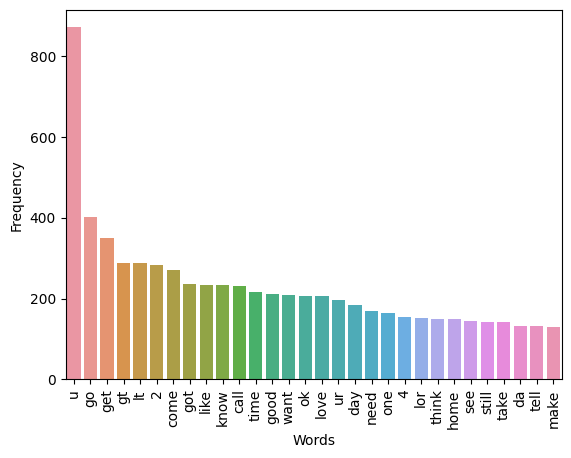

In [115]:
top_words(0)

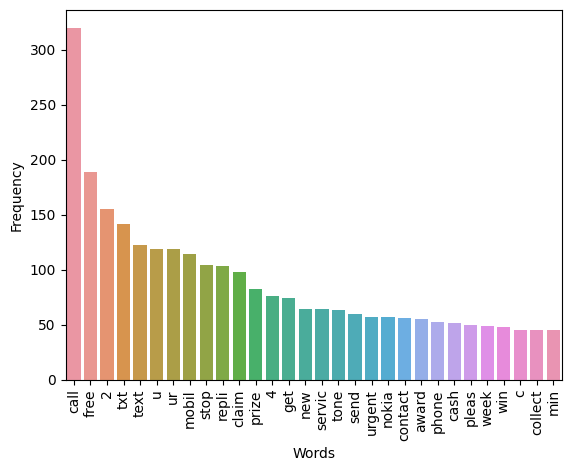

In [116]:
top_words(1)

In [118]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [119]:
tf_idf = TfidfVectorizer(max_features=3500)

In [120]:
x = tf_idf.fit_transform(df["transformed_text"]).toarray()

In [121]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [122]:
y = df["target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [123]:
x.shape, y.shape

((5169, 3500), (5169,))

In [124]:
from sklearn.model_selection import train_test_split

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [128]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [129]:
for model in [GaussianNB(), MultinomialNB(), BernoulliNB()]:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{model}")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    print(f"Precision Score: {precision_score(y_test, y_pred)}")
    print(f"Confusion Matrix : \n{confusion_matrix(y_test, y_pred)}")
    print("\n===================\n")

GaussianNB()
Accuracy Score: 0.867504835589942
Precision Score: 0.5245901639344263
Confusion Matrix : 
[[769 116]
 [ 21 128]]


MultinomialNB()
Accuracy Score: 0.9642166344294004
Precision Score: 1.0
Confusion Matrix : 
[[885   0]
 [ 37 112]]


BernoulliNB()
Accuracy Score: 0.9748549323017408
Precision Score: 0.992
Confusion Matrix : 
[[884   1]
 [ 25 124]]




In [130]:
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9642166344294004
1.0
